In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

# decide the style
sns.set_theme(style="white", context="talk", font="sans-serif")

In [3]:
# read in data to panda
Celegans_ref = 100300000
read_length = 150

path="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Analyse_Reads_GC/"
file1="Readstat_collect_20240314.txt"
file2="GC_content_20240311_1P.txt"

df_1=pd.read_csv(path+file1,header=0,delimiter="\t")
df_GC=pd.read_csv(path+file2,header=0,delimiter="\t")

# join the data frames according to Sample
df_reads = pd.merge(df_1, df_GC, on="Sample", how="inner", suffixes=('_x','_y'))
df_reads

,Sample,RawReads1,RawReads2,TrimReads1,TrimReads2,CEReads1,CEReads2,CEReadsS,woCEReads1,woCEReads2,...,uMapPair,MapPair,MappPair,First_peak_%,GC_count,first_peak_width,second_peak_%,GC_content,second_peak_width,Ratio_peaks
0,NIOO_bb_15_3,46055360,46055360,40984468,40984468,12700659,12700659,349992,27933817,27933817,...,55867634,25751310,24883860,37,592527,14,69.0,1985492.0,11.0,0.298
1,Gent_iso_15_2,44111408,44111408,39123040,39123040,27481881,27481881,438375,11202784,11202784,...,22405568,55402137,53627172,38,1267420,21,71.0,892951.5,8.0,1.419
2,Gent_bb_15_1,45334890,45334890,40473346,40473346,36962631,36962631,339975,3170740,3170740,...,6341480,74265237,71962944,37,1667144,21,69.0,217179.0,7.0,7.676
3,Gent_bb_15_4,45330812,45330812,39904258,39904258,37464504,37464504,335962,2103792,2103792,...,4207584,75264970,72929964,37,1693784,21,72.0,146515.0,7.0,11.560
4,Gent_bb_15_5,47111130,47111130,41604623,41604623,36201937,36201937,385111,5017575,5017575,...,10035150,72788985,70832864,37,1634017,21,72.0,346596.0,9.0,4.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,WUR_bb_1_2,93373726,93373726,87364406,87364406,70304354,70304354,766697,16293355,16293355,...,32586710,141375405,136266794,38,3141548,22,70.0,1345672.5,8.0,2.335
89,WUR_bb_15_3,89332459,89332459,84750878,84750878,39939054,39939054,951693,43860131,43860131,...,87720262,80829801,77848768,37,1800265,19,71.0,3603025.5,10.0,0.500
90,WUR_bb_15_2,86350511,86350511,81915027,81915027,29827191,29827191,700390,51387446,51387446,...,102774892,60354772,58380652,37,1368348,18,70.0,4160011.5,10.0,0.329
91,WUR_bb_1_1,91326465,91326465,80959977,80959977,78109501,78109501,557407,2293069,2293069,...,4586138,156776409,150099170,38,3456079,22,70.0,161828.0,5.0,21.356


Text(0, 0.5, 'reads associated to \n first GC peak/ second GC peak')

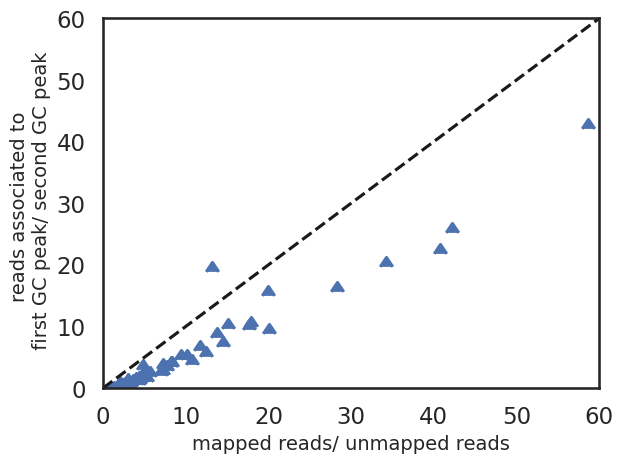

In [4]:
# plot the correlation between peak fraction and % mapped reads
fig, ax = plt.subplots()
#ax.set_yscale('log')

# I want to plot the ratio of mapped and unmapped reads:
ratio_map_unmap = np.divide(pd.array(df_reads.MapPair),pd.array(df_reads.uMapPair))

# .. against the ratio of GC peaks  
ratio_peaks = pd.array(df_reads.Ratio_peaks)
ratio_peaks_wWidth = np.multiply(ratio_peaks,np.divide(pd.array(df_reads.first_peak_width),pd.array(df_reads.second_peak_width)))

plt.scatter(ratio_map_unmap,ratio_peaks,marker=6)
plt.plot([0,200],[0,200], '--k')
ax.set_xlim([0,60])
ax.set_ylim([0,60])

ax.set_xlabel('mapped reads/ unmapped reads', fontsize=14)
ax.set_ylabel('reads associated to \n first GC peak/ second GC peak', fontsize=14)


# Where data comes from:

## original trimmed data

    - trimmed reads were used to map to Celegans creating bam files
        - all_reads: means trimmed reads
        - all_bam: means all reads that were part of the bam file, extracted using flag: **-F 256 -F 2048**
    1. should hold: all_reads = all_bam

## mapping reads

    - from the bam file, mapping reads were extracted and written to new fastq files. there were files containing paired reads (-R1, _R2) and such for the singeltons (_S)
        - MapPair_reads: paired reads written from bam using the flag: **-f 1 -F 4 -F 256**
        - MapS_reads: singleton reads written from bam using the flag: **-f 1 -F 4 -F 256**
        - MapPair_bam: information taken from bam using flag: **-f 1 -F 4 -F 256 -F 2048**
        
    2. should hold: MapPair_reads + MapS_reads = MapPair_bam

## unmapping reads

    - from the bam file, UNmapping reads were extracted and written to new fastq files. there were files containing paired reads (-R1, _R2) and such for the singeltons (_S)
        - uMapPair_reads: reads written from bam using the flag: **-f 4 -F 256**
        - uMapS_reads: singleton reads written from bam using the flag: **-f 4 -F 256**
        - uMapPair_bam: information taken from bam using flag: **-f 4 -F 256 -F 2048**    
        
    3. should hold: uMapPair_reads + uMapS_reads= uMapPair_bam

  

In [5]:
# Get only the data we want from this and write to new data frame 
### interesting series:

# set Sample to index
df_reads.set_index('Sample',inplace=True)

df_pick = pd.DataFrame(
    {
        'all_reads': pd.array(df_reads.TrimReads1) + pd.array(df_reads.TrimReads2),
        'all_bam': pd.array(df_reads.allReads),
        'MapPair_reads': pd.array(df_reads.CEReads1) + pd.array(df_reads.CEReads2),
        'MapS_reads': pd.array(df_reads.CEReadsS),
        'MapPair_bam': pd.array(df_reads.MapPair),
        'uMapPair_reads': pd.array(df_reads.woCEReads1) + pd.array(df_reads.woCEReads2),
        'uMapS_reads': pd.array(df_reads.woCEReadsS),
        'uMapPair_bam': pd.array(df_reads.uMapPair),      
    }
)

df_pick.index = df_reads.index.tolist()

# 1. should hold:
if df_pick.all_reads.equals(df_pick.all_bam) == False:
    print("Something went wrong here in 1!")

# 2. should hold
if all((df_pick.MapPair_reads + df_pick.MapS_reads) == df_pick.MapPair_bam) == False:
    print("Something went wrong here in 2!")


# 3. should hold
if df_pick.uMapPair_reads.equals(df_pick.uMapPair_bam) == False:
    print("Something went wrong here in 3!")

df_pick

Something went wrong here in 3!


,all_reads,all_bam,MapPair_reads,MapS_reads,MapPair_bam,uMapPair_reads,uMapS_reads,uMapPair_bam
NIOO_bb_15_3,81968936,81968936,25401318,349992,25751310,55867634,349992,55867634
Gent_iso_15_2,78246080,78246080,54963762,438375,55402137,22405568,438375,22405568
Gent_bb_15_1,80946692,80946692,73925262,339975,74265237,6341480,339975,6341480
Gent_bb_15_4,79808516,79808516,74929008,335962,75264970,4207584,335962,4207584
Gent_bb_15_5,83209246,83209246,72403874,385111,72788985,10035150,385111,10035150
...,...,...,...,...,...,...,...,...
WUR_bb_1_2,174728812,174728812,140608708,766697,141375405,32586710,766697,32586710
WUR_bb_15_3,169501756,169501756,79878108,951693,80829801,87720262,951693,87720262
WUR_bb_15_2,163830054,163830054,59654382,700390,60354772,102774892,700390,102774892
WUR_bb_1_1,161919954,161919954,156219002,557407,156776409,4586138,557407,4586138


In [6]:
# split the sample names into institution ...
institution = []
treatment = []
week = []
rep = []

rowNames = df_pick.index.tolist()

for i in rowNames:
    nameList = i.split('_')
    institution.append(nameList[0])
    treatment.append(nameList[1])
    week.append(nameList[2])
    rep.append(nameList[3])

#add columns to the dataframe
df_pick.insert(0, "institution", institution)
df_pick.insert(1, "treatment", treatment)
df_pick.insert(2, "week", week)
df_pick.insert(2, "replicate", rep)

# Sort and tidy up the dataframe
df_sort=df_pick.sort_values(['institution','treatment','week','replicate'])
df_sort

,institution,treatment,replicate,week,all_reads,all_bam,MapPair_reads,MapS_reads,MapPair_bam,uMapPair_reads,uMapS_reads,uMapPair_bam
Gent_bb_1_1,Gent,bb,1,1,189064180,189064180,184642940,632365,185275305,3156510,632365,3156510
Gent_bb_1_2,Gent,bb,2,1,120235584,120235584,100109644,613931,100723575,18898078,613931,18898078
Gent_bb_1_3,Gent,bb,3,1,161341946,161341946,139939646,717292,140656938,19967716,717292,19967716
Gent_bb_1_4,Gent,bb,4,1,157284642,157284642,152484222,522788,153007010,3754844,522788,3754844
Gent_bb_15_1,Gent,bb,1,15,80946692,80946692,73925262,339975,74265237,6341480,339975,6341480
...,...,...,...,...,...,...,...,...,...,...,...,...
WUR_bb_15_1,WUR,bb,1,15,223898276,223898276,48535074,777040,49312114,173809122,777040,173809122
WUR_bb_15_2,WUR,bb,2,15,163830054,163830054,59654382,700390,60354772,102774892,700390,102774892
WUR_bb_15_3,WUR,bb,3,15,169501756,169501756,79878108,951693,80829801,87720262,951693,87720262
WUR_bleach_15_1,WUR,bleach,1,15,92982086,92982086,81126756,346742,81473498,11161846,346742,11161846


In [7]:
# add the relative mapped and unmapped reads as columns:
df_sort["MapPair_bam_rel"] = np.divide(pd.array(df_sort.MapPair_bam),pd.array(df_sort.all_bam))
df_sort["uMapPair_bam_rel"] = np.divide(pd.array(df_sort.uMapPair_bam),pd.array(df_sort.all_bam))

# add the average coverage 
df_sort["coverage"] = pd.array(df_sort.MapPair_bam)*read_length/Celegans_ref
df_sort

,institution,treatment,replicate,week,all_reads,all_bam,MapPair_reads,MapS_reads,MapPair_bam,uMapPair_reads,uMapS_reads,uMapPair_bam,MapPair_bam_rel,uMapPair_bam_rel,coverage
Gent_bb_1_1,Gent,bb,1,1,189064180,189064180,184642940,632365,185275305,3156510,632365,3156510,0.979960,0.016695,277.081712
Gent_bb_1_2,Gent,bb,2,1,120235584,120235584,100109644,613931,100723575,18898078,613931,18898078,0.837719,0.157175,150.633462
Gent_bb_1_3,Gent,bb,3,1,161341946,161341946,139939646,717292,140656938,19967716,717292,19967716,0.871794,0.123760,210.354344
Gent_bb_1_4,Gent,bb,4,1,157284642,157284642,152484222,522788,153007010,3754844,522788,3754844,0.972803,0.023873,228.824043
Gent_bb_15_1,Gent,bb,1,15,80946692,80946692,73925262,339975,74265237,6341480,339975,6341480,0.917459,0.078341,111.064662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WUR_bb_15_1,WUR,bb,1,15,223898276,223898276,48535074,777040,49312114,173809122,777040,173809122,0.220243,0.776286,73.746930
WUR_bb_15_2,WUR,bb,2,15,163830054,163830054,59654382,700390,60354772,102774892,700390,102774892,0.368399,0.627326,90.261374
WUR_bb_15_3,WUR,bb,3,15,169501756,169501756,79878108,951693,80829801,87720262,951693,87720262,0.476867,0.517518,120.882055
WUR_bleach_15_1,WUR,bleach,1,15,92982086,92982086,81126756,346742,81473498,11161846,346742,11161846,0.876228,0.120043,121.844713


In [8]:
# if you want, you can predefine a subset of data that you want to plot:

df_sort_Gent = df_sort.loc[df_sort['institution'].isin(['Gent'])]
df_sort_01 = df_sort.loc[df_sort['week'].isin(['0','1'])]
df_sort_15 = df_sort.loc[df_sort['week'].isin(['15'])]

df_sort_NIOO = df_sort.loc[df_sort['institution'].isin(['NIOO'])]



<NumpyExtensionArray>
[189064180, 120235584, 161341946, 157284642,  80946692,  88645186,  85301114,
  79808516,  83209246, 158412148,  78246080,  89492802, 125700892]
Length: 13, dtype: int64


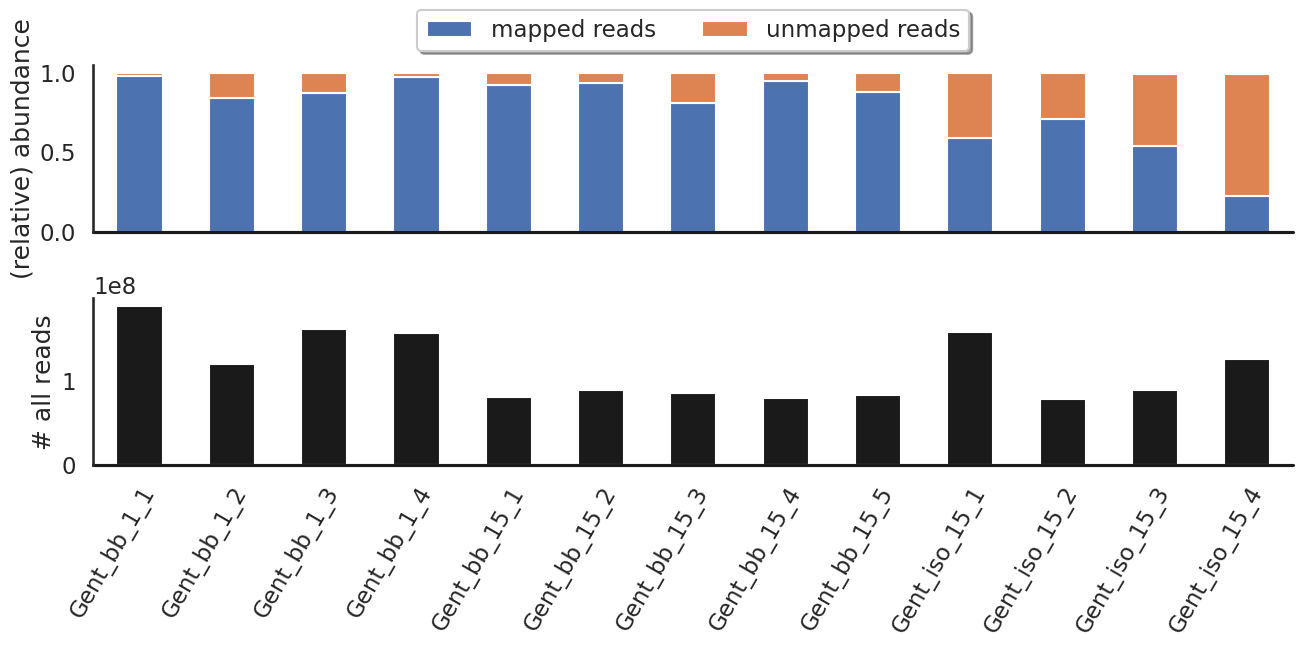

<Figure size 640x480 with 0 Axes>

In [9]:
### RAW
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1,hspace=0.4)

# WHAT do you wan to plot?
df_plot = df_sort_Gent

# Generate some sequential data
rows = df_plot.index.tolist()

x = rows
y1 = pd.array(df_plot.all_reads)
y2_abs = {
    "mapped reads": pd.array(df_plot.MapPair_bam),
    "unmapped reads": pd.array(df_plot.uMapPair_bam),
}

y2_norm = {
    "mapped reads": pd.array(df_plot.MapPair_bam_rel),
    "unmapped reads": pd.array(df_plot.uMapPair_bam_rel),
}

y2 = y2_norm
wi = 0.5

sampleNum=np.size(x)
bottom = np.zeros(sampleNum)
for boolean, i in y2.items():
    p = ax1.bar(x, i, wi, label=boolean, bottom=bottom)
    bottom += i

#ax1.set_title("Read statistics")
ax1.legend(loc="upper right")
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          fancybox=True, shadow=True, ncol=5)

ax1.set_ylabel("(relative) abundance")
ax1.axhline(0, color="k", clip_on=False)

sns.barplot(x=x, y=y1, color='k', ax=ax2, width=wi)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("# all reads")


# Randomly reorder the data to make it qualitative
#y2 = rs.choice(y1, len(y1), replace=False)
#sns.barplot(x=x, y=y3, hue=x, palette="deep", ax=ax3)
#ax3.axhline(0, color="k", clip_on=False)
#ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=2)

ax2.set_xticks(list(range(df_plot.shape[0])))
ax2.set_xticklabels(rows, rotation=60, ha='right', rotation_mode='anchor')
print(y1)

plt.show()


plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Analyse_Reads_GC/plots/NIOO_bars.jpg',
            dpi=1000)

# Look at systematic for all reads

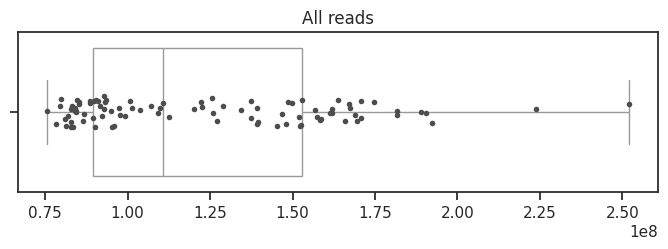

In [10]:
# # IDEA:
# # ------ show all reads and their grouping according to different categories 
# # make a boxplot that shows the number and mean of all reads!

sns.set_theme(style="ticks")

# Initialize the figure 
f1, ax = plt.subplots(figsize=(8, 2), sharex=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3,hspace=0.4)
ax.set_title("All reads")

sns.boxplot(
    df_sort, x="all_reads",
    whis=[0, 100], width=.8, ax=ax, color="w")
# Add in points to show each observation
sns.stripplot(df_sort, x="all_reads", size=4, color="0.3", ax=ax)

ax.set(xlabel=None)
plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Analyse_Reads_GC/plots/AllReads.jpg',
            bbox_inches='tight', dpi=1000)

<Axes: xlabel='all_reads', ylabel='week'>

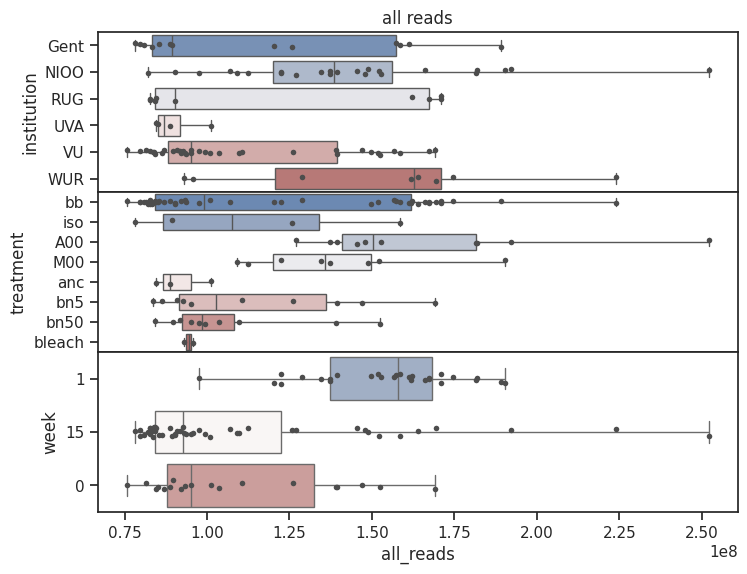

In [11]:
# make a boxplot that shows the number and mean of mapped reads!

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f2, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0,hspace=0)
ax1.set_title("all reads")

#####
### AX1: plot per institution
## plot the data according to institutions
sns.boxplot(
    df_sort, x="all_reads", y="institution", hue="institution",
    whis=[0, 100], width=.8, palette="vlag", ax=ax1
)
# Add in points to show each observation
sns.stripplot(df_sort, x="all_reads", y="institution", size=4, color=".3", ax=ax1)

#####
### AX2: plot per treatment
sns.boxplot(
    df_sort, x="all_reads", y="treatment", hue="treatment",
    whis=[0, 100], width=.8, palette="vlag", ax=ax2
)
# Add in points to show each observation
sns.stripplot(df_sort, x="all_reads", y="treatment", size=4, color=".3", ax=ax2)


#####
### AX3: plot per week
## plot the data according to week
sns.boxplot(
    df_sort, x="all_reads", y="week", hue="week",
    whis=[0, 100], width=.8, palette="vlag", ax=ax3
)
## Add in points to show each observation
sns.stripplot(df_sort, x="all_reads", y="week", size=4, color=".3", ax=ax3)


# Look at systematic for all mapped/ unmapped reads

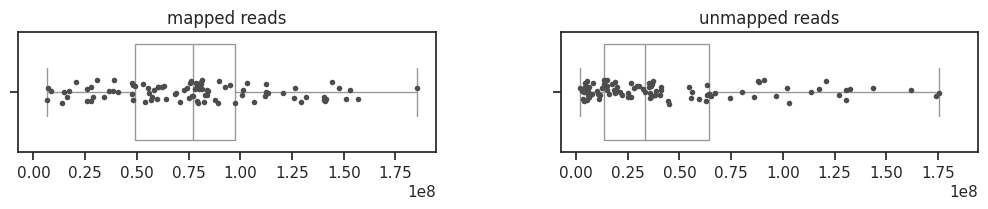

In [12]:
# # IDEA:
# # ------ show all mapped/ unmapped reads and their grouping according to different categories 
# # make a boxplot that shows the number and mean of all reads!

sns.set_theme(style="ticks")

# Initialize the figure 
f1, ((ax1, ax2)) = plt.subplots(1,2, figsize=(12, 1.5), sharex=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3,hspace=0.4)
ax1.set_title("mapped reads")
ax2.set_title("unmapped reads")

sns.boxplot(
    df_sort, x="MapPair_bam",
    whis=[0, 100], width=.8, ax=ax1, color="w")
# Add in points to show each observation
sns.stripplot(df_sort, x="MapPair_bam", size=4, color=".3", ax=ax1)

sns.boxplot(
    df_sort, x="uMapPair_bam",
    whis=[0, 100], width=.8, ax=ax2, color="w")
# Add in points to show each observation
sns.stripplot(df_sort, x="uMapPair_bam", size=4, color=".3", ax=ax2)

ax1.set(xlabel=None)
ax2.set(xlabel=None)

plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Analyse_Reads_GC/plots/Mapped_Unmapped_Reads_ABS.jpg',
            bbox_inches='tight', dpi=1000)

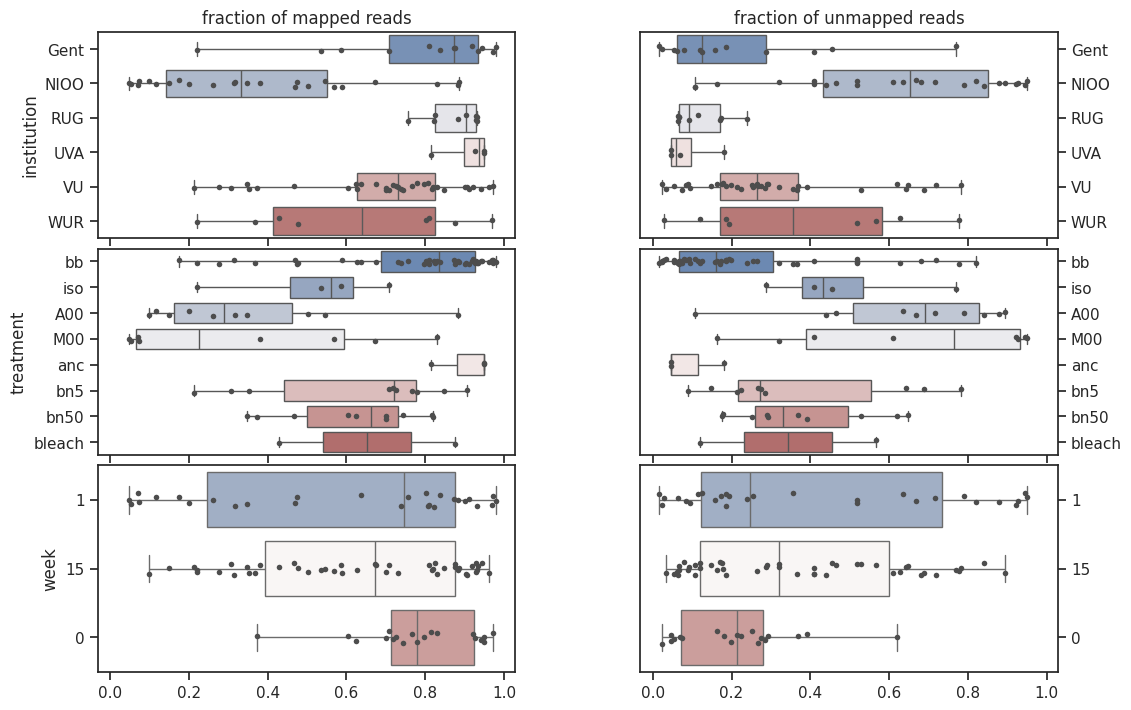

In [13]:
# make a boxplot that shows the number and mean of mapped reads!

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 8), sharex=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,  wspace=0.3,hspace=0.05)
ax1.set_title("fraction of mapped reads")
ax2.set_title("fraction of unmapped reads")

#####
### AX1 & AX2: plot per institution
## plot the data according to institutions
sns.boxplot(
    df_sort, x="MapPair_bam_rel", y="institution", hue="institution",
    whis=[0, 100], width=.8, palette="vlag", ax=ax1
)
# Add in points to show each observation
sns.stripplot(df_sort, x="MapPair_bam_rel", y="institution", size=4, color=".3", ax=ax1)

sns.boxplot(
    df_sort, x="uMapPair_bam_rel", y="institution", hue="institution",
    whis=[0, 100], width=.8, palette="vlag", ax=ax2
)
# Add in points to show each observation
sns.stripplot(df_sort, x="uMapPair_bam_rel", y="institution", size=4, color=".3", ax=ax2)

#####
### AX3 & AX4: plot per treatment
sns.boxplot(
    df_sort, x="MapPair_bam_rel", y="treatment", hue="treatment",
    whis=[0, 100], width=.8, palette="vlag", ax=ax3
)
# Add in points to show each observation
sns.stripplot(df_sort, x="MapPair_bam_rel", y="treatment", size=4, color=".3", ax=ax3)

sns.boxplot(
    df_sort, x="uMapPair_bam_rel", y="treatment", hue="treatment",
    whis=[0, 100], width=.8, palette="vlag", ax=ax4
)
# Add in points to show each observation
sns.stripplot(df_sort, x="uMapPair_bam_rel", y="treatment", size=4, color=".3", ax=ax4)


#####
### AX5 & AX6: plot per week
## plot the data according to week
sns.boxplot(
    df_sort, x="MapPair_bam_rel", y="week", hue="week",
    whis=[0, 100], width=.8, palette="vlag", ax=ax5
)
## Add in points to show each observation
sns.stripplot(df_sort, x="MapPair_bam_rel", y="week", size=4, color=".3", ax=ax5)

sns.boxplot(
    df_sort, x="uMapPair_bam_rel", y="week", hue="week",
    whis=[0, 100], width=.8, palette="vlag", ax=ax6
)
## Add in points to show each observation
sns.stripplot(df_sort, x="uMapPair_bam_rel", y="week", size=4, color=".3", ax=ax6)

ax2.set(ylabel="")
ax4.set(ylabel="")
ax5.set(xlabel=None)
ax6.set(ylabel="",xlabel=None)
ax2.yaxis.tick_right()
ax4.yaxis.tick_right()
ax6.yaxis.tick_right()

plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Analyse_Reads_GC/plots/Mapped_Unmapped_Reads_REL_PAttern_space.jpg',
            bbox_inches='tight', dpi=1000)

In [14]:
# Find the "high microbe load samples"

# first, get the mean and std of the distribution:
unmapped_mean = df_sort.loc[:, 'uMapPair_bam_rel'].mean()
unmapped_std = df_sort.loc[:, 'uMapPair_bam_rel'].std()

#df_sort.loc[df_sort]
CI = [unmapped_mean-1.5*unmapped_std,unmapped_mean+1.5*unmapped_std]

outliers = df_sort.loc[(df_sort['uMapPair_bam_rel']>CI[1])]
outliers.sort_values('coverage')

#mapped_mean = df_sort.loc[:, 'MapPair_bam'].mean()
#mapped_mean*read_length/Celegans_ref

,institution,treatment,replicate,week,all_reads,all_bam,MapPair_reads,MapS_reads,MapPair_bam,uMapPair_reads,uMapS_reads,uMapPair_bam,MapPair_bam_rel,uMapPair_bam_rel,coverage
NIOO_M00_1_4,NIOO,M00,4,1,137311574,137311574,6278832,359017,6637849,130314708,359017,130314708,0.048342,0.949044,9.926993
NIOO_M00_1_3,NIOO,M00,3,1,134405616,134405616,6694134,321511,7015645,127068460,321511,127068460,0.052198,0.945410,10.491992
NIOO_M00_1_5,NIOO,M00,5,1,122555550,122555550,8315120,334173,8649293,113572084,334173,113572084,0.070574,0.926699,12.935134
NIOO_M00_1_1,NIOO,M00,1,1,190340846,190340846,12816384,1067204,13883588,175390054,1067204,175390054,0.072941,0.921453,20.763093
NIOO_A00_15_1,NIOO,A00,1,15,147900604,147900604,13547886,1022029,14569915,132308660,1022029,132308660,0.098512,0.894578,21.789504
NIOO_A00_1_4,NIOO,A00,4,1,137312156,137312156,15422038,565784,15987822,120758550,565784,120758550,0.116434,0.879445,23.910003
NIOO_bb_1_4,NIOO,bb,4,1,97510146,97510146,16800082,290133,17090215,80129798,290133,80129798,0.175266,0.821759,25.558647
VU_bn5_15_3,VU,bn5,3,15,95015010,95015010,20064992,281020,20346012,74387978,281020,74387978,0.214135,0.782908,30.427735
Gent_iso_15_4,Gent,iso,4,15,125700892,125700892,26339540,1372809,27712349,96615734,1372809,96615734,0.220463,0.768616,41.444191
NIOO_A00_15_5,NIOO,A00,5,15,192147250,192147250,26968922,1680401,28649323,161817526,1680401,161817526,0.149101,0.842154,42.845448


# Get the coverage of the samples

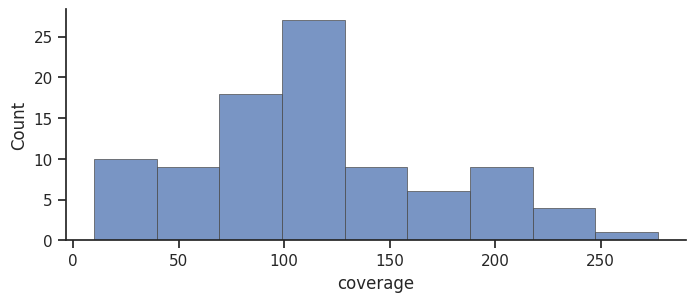

In [16]:
# plot the coverage as histogram

fig3, ax = plt.subplots(figsize=(8,3))

sns.set_theme(style="ticks")

sns.despine(fig3)

sns.histplot(
    df_sort,
    x="coverage",
    edgecolor=".3",
    linewidth=.5,
    binwidth=30,
)

#sns.histplot(
#    outliers,
#    x="coverage",
#    edgecolor=".3",
#    linewidth=.5,
#    binwidth=20,
#)

plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Analyse_Reads_GC/plots/Coverage.jpg',
            bbox_inches='tight', dpi=1000)


Text(0, 0.5, 'la la')

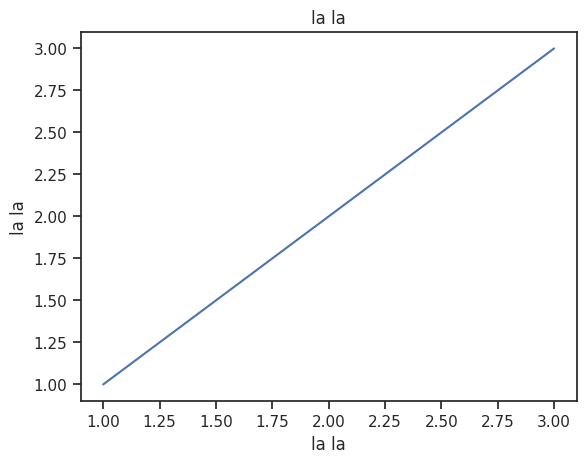

In [17]:
## test
fig1, ax1 = plt.subplots()

axisHere = [ax1]
axisHere[0].plot([1,2,3],[1,2,3])
axisHere[0].set_title("la la")
axisHere[0].set_xlabel("la la")
axisHere[0].set_ylabel("la la")

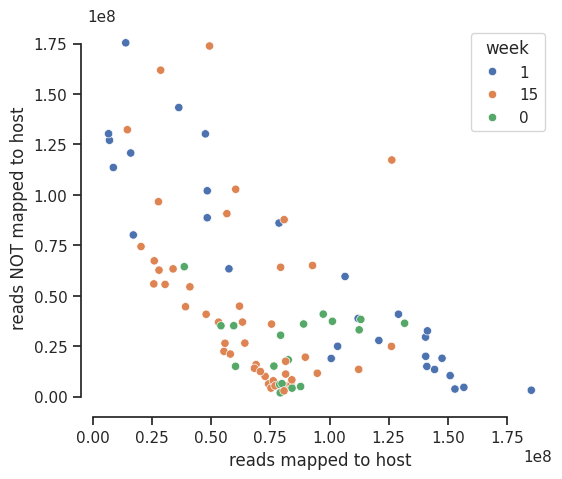

In [20]:
## 

fig10, ax10 = plt.subplots(figsize=(6,5))
sns.scatterplot(df_sort, x="MapPair_bam", y="uMapPair_bam", hue = "week", ax=ax10, color="k")
#sns.scatterplot(df_sort[df_sort["institution"]=="NIOO"], x="MapPair_bam", y="uMapPair_bam", color="red", ax=ax10, label="NIOO")

ax10.set_xlabel("reads mapped to host")
ax10.set_ylabel("reads NOT mapped to host")

sns.despine(offset=5, trim=True)
fig10.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Analyse_Reads_GC/plots/Unmapped_vs_mappedReads_onlyNIOOcolor.svg", 
             dpi=300, bbox_inches='tight')

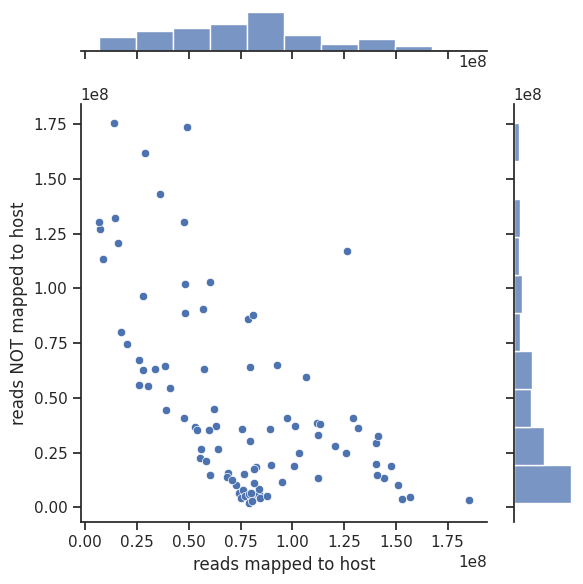

In [19]:

h = sns.jointplot(df_sort, x="MapPair_bam", y="uMapPair_bam", kind="scatter", marginal_kws=dict(bins=10))

# JointGrid has a convenience function
h.set_axis_labels('reads mapped to host', 'reads NOT mapped to host', fontsize=12)

# or set labels via the axes objects
#h.ax_joint.set_xlabel('new x label', fontweight='bold')

# labels appear outside of plot area, so auto-adjust
h.figure.tight_layout() 

h.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Analyse_Reads_GC/plots/Unmapped_vs_mappedReads_JointPlot.svg", 
             dpi=300, bbox_inches='tight')